<a href="https://colab.research.google.com/github/chintans/DL-Week1/blob/main/MSE_vs_MAE_Loss_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Loss Functions in Practice: MSE vs MAE (Ready for Colab)

This notebook gives you a teaching-ready, hands-on tour of **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**:

**What you'll do:**
1. Understand the formulas and intuition (with clean visuals)
2. Compute MSE & MAE *manually*
3. See how each loss **penalizes errors** (line plots)
4. Train a tiny **linear model** twice (once with MSE, once with MAE) and compare:
   - Loss curves over epochs
   - Fitted lines **with outliers** (to show robustness)

> No external libraries beyond NumPy & Matplotlib are required.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)



## 1) Theory: What are MSE and MAE?

**Mean Squared Error (MSE)**  
\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

- Squares each error → punishes large errors much more
- Smooth derivative → works nicely with gradient descent
- Sensitive to outliers

**Mean Absolute Error (MAE)**  
\[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]

- Linear penalty → treats all errors proportionally
- Robust to outliers
- Uses a subgradient at 0 (sign function) for optimization



## 2) Manual Calculation Example
We'll compute MSE and MAE by hand on a tiny dataset.


Errors: [ 0.5 -0.5 -0.1 -0.8]
MSE (manual): 0.2875
MAE (manual): 0.4750


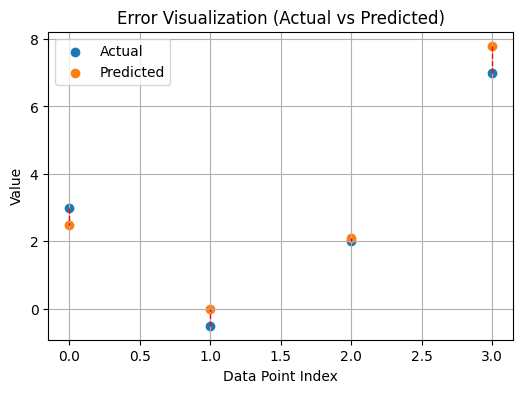

In [2]:

# Actual and predicted values
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

errors = y_true - y_pred
mse = np.mean(errors**2)
mae = np.mean(np.abs(errors))

print("Errors:", errors)
print(f"MSE (manual): {mse:.4f}")
print(f"MAE (manual): {mae:.4f}")

# Visualize the errors
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_true)), y_true, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
for i in range(len(y_true)):
    plt.plot([i, i], [y_true[i], y_pred[i]], 'r--', linewidth=1)  # error lines
plt.title("Error Visualization (Actual vs Predicted)")
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



## 3) How do they penalize errors?
MSE grows **quadratically** with error size; MAE grows **linearly**.


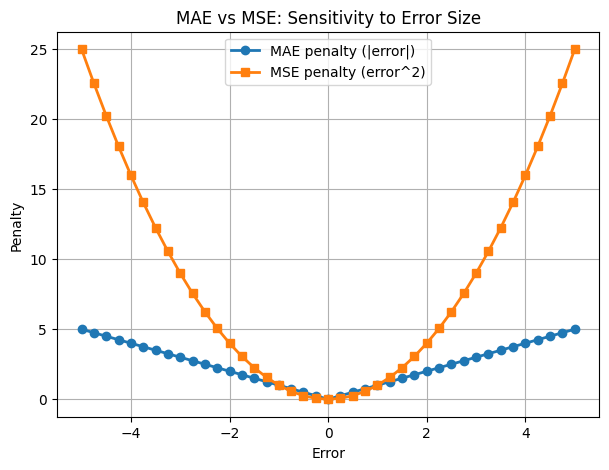

In [3]:

errors = np.linspace(-5, 5, 41)
mse_penalties = errors**2
mae_penalties = np.abs(errors)

plt.figure(figsize=(7,5))
plt.plot(errors, mae_penalties, marker='o', label='MAE penalty (|error|)', linewidth=2)
plt.plot(errors, mse_penalties, marker='s', label='MSE penalty (error^2)', linewidth=2)
plt.title("MAE vs MSE: Sensitivity to Error Size")
plt.xlabel("Error")
plt.ylabel("Penalty")
plt.legend()
plt.grid(True)
plt.show()



## 4) Training Demo: Linear Regression with Outliers
We'll train a simple linear model twice (NumPy):
- once using **MSE**
- once using **MAE** (via subgradient: `sign(error)`)

Then compare loss curves and fitted lines. Outliers show how **MAE is more robust**.


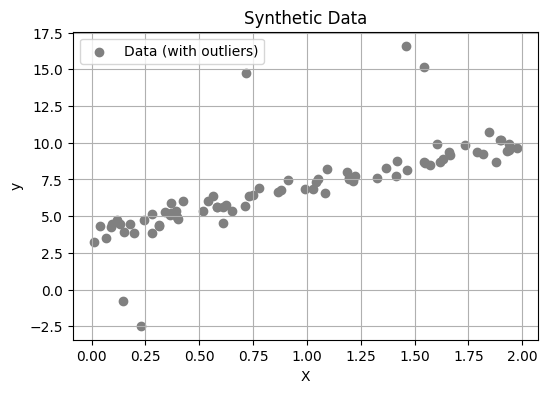

In [4]:

# Create data: y = 4 + 3x + noise, then add a couple outliers
np.random.seed(42)
X = 2 * np.random.rand(80, 1)
y = 4 + 3 * X + np.random.randn(80, 1) * 0.5

# Add outliers
y[-5:] += np.array([[8],[7],[-6],[9],[-7]])

# Plot data
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='gray', label='Data (with outliers)')
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


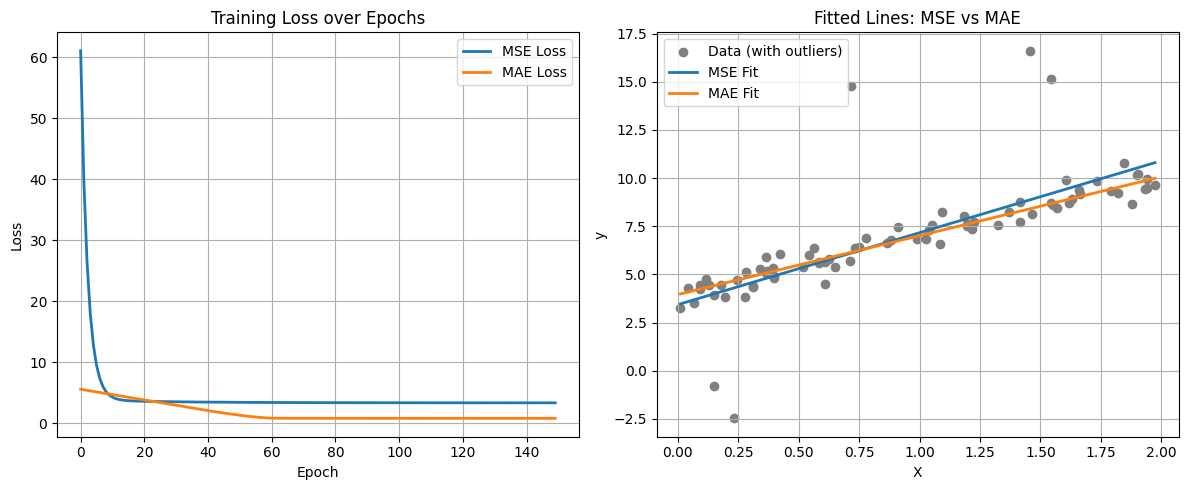

MSE Fit: slope=3.733, intercept=3.435
MAE Fit: slope=3.055, intercept=3.960


In [5]:

def train_linear_model(X, y, loss='MSE', lr=0.05, epochs=150, verbose=False):
    # Train y ~ m*X + b via gradient descent using MSE or MAE (subgradient).
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    n = len(X)
    m, b = np.random.randn(), np.random.randn()
    history = []

    for epoch in range(epochs):
        y_pred = m*X + b
        errors = y - y_pred

        if loss.upper() == 'MSE':
            L = np.mean(errors**2)
            dm = (-2/n) * np.sum(X * errors)
            db = (-2/n) * np.sum(errors)
        elif loss.upper() == 'MAE':
            L = np.mean(np.abs(errors))
            sgn = np.sign(errors)
            dm = (-1/n) * np.sum(sgn * X)
            db = (-1/n) * np.sum(sgn)
        else:
            raise ValueError("loss must be 'MSE' or 'MAE'")

        m -= lr * dm
        b -= lr * db

        history.append(L)
        if verbose and (epoch+1) % 25 == 0:
            print(f"Epoch {epoch+1:3d} | {loss} loss: {L:.4f} | m={m:.3f}, b={b:.3f}")

    return m, b, history

# Train both models
m_mse, b_mse, hist_mse = train_linear_model(X, y, loss='MSE')
m_mae, b_mae, hist_mae = train_linear_model(X, y, loss='MAE')

# Plot loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist_mse, label='MSE Loss', linewidth=2)
plt.plot(hist_mae, label='MAE Loss', linewidth=2)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

# Plot fits
plt.subplot(1,2,2)
plt.scatter(X, y, color='gray', label='Data (with outliers)')
xs = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
plt.plot(xs, m_mse*xs + b_mse, label='MSE Fit', linewidth=2)
plt.plot(xs, m_mae*xs + b_mae, label='MAE Fit', linewidth=2)
plt.title("Fitted Lines: MSE vs MAE")
plt.xlabel("X"); plt.ylabel("y")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

print(f"MSE Fit: slope={m_mse:.3f}, intercept={b_mse:.3f}")
print(f"MAE Fit: slope={m_mae:.3f}, intercept={b_mae:.3f}")



## 5) Choosing the right loss
- **MSE**: prefer when large errors are very costly and you want the optimizer to chase them down aggressively.
- **MAE**: prefer when robustness to outliers matters and you want an error in the same units as the target.

**Bonus idea:** Try **Huber loss** to blend both behaviors (quadratic near zero, linear for large errors).
